In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
len(df)

6362620

In [5]:
df['type'].nunique()

5

In [6]:
df['nameOrig'].nunique()

6353307

In [7]:
df['type'].isnull().value_counts()

False    6362620
Name: type, dtype: int64

In [8]:
def null_counts(df):
    for col in df.columns:
        print(df[col].isnull().value_counts())
null_counts(df)

False    6362620
Name: step, dtype: int64
False    6362620
Name: type, dtype: int64
False    6362620
Name: amount, dtype: int64
False    6362620
Name: nameOrig, dtype: int64
False    6362620
Name: oldbalanceOrg, dtype: int64
False    6362620
Name: newbalanceOrig, dtype: int64
False    6362620
Name: nameDest, dtype: int64
False    6362620
Name: oldbalanceDest, dtype: int64
False    6362620
Name: newbalanceDest, dtype: int64
False    6362620
Name: isFraud, dtype: int64
False    6362620
Name: isFlaggedFraud, dtype: int64


In [9]:
def unique_values(df):
    for col in df.columns:
        print(col,df[col].nunique())
unique_values(df)

step 743
type 5
amount 5316900
nameOrig 6353307
oldbalanceOrg 1845844
newbalanceOrig 2682586
nameDest 2722362
oldbalanceDest 3614697
newbalanceDest 3555499
isFraud 2
isFlaggedFraud 2


In [10]:
df.drop('isFlaggedFraud',axis=1,inplace=True)

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [12]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


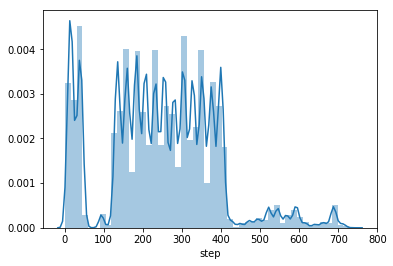

In [17]:
sns.distplot(df['step'])

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


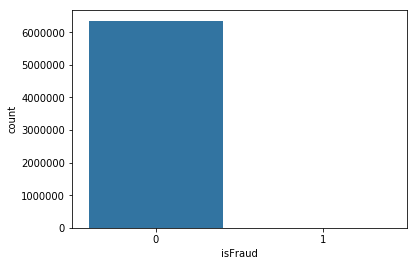

In [21]:
sns.countplot(df['isFraud'])

In [22]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

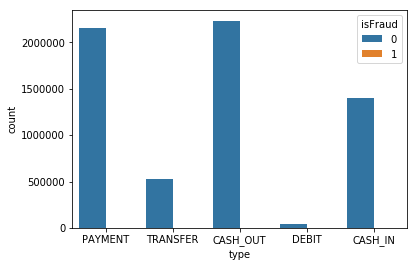

In [25]:
sns.countplot(x='type',hue='isFraud',data=df)

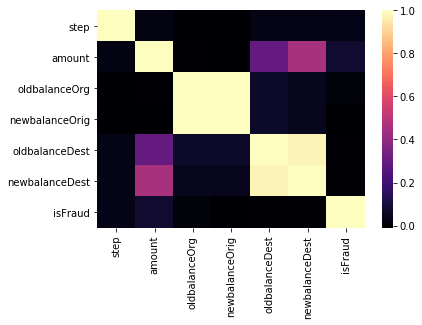

In [26]:
sns.heatmap(df.corr(),cmap='magma')